# **Spam Classifier (Sentiment Analysis)**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset is in tsv format (tab seperated values)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SMSSpamCollection', sep='\t', names=['target','text'])

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
for i in range(10):
  print(df.iloc[i,-1])
  print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

## **Data Cleaning**
- remove unwanted seperators
- remove stopwords (eg: the,a,for,this etc)
- remove stems (eg: play,playing,played)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
sn = SnowballStemmer('english')
stop = set(stopwords.words('english'))

In [15]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
def cleanText(text):
  text = text.lower()
  text = re.sub('[^a-z0-9]',' ',text)
  text = nltk.word_tokenize(text)
  text = [sn.stem(word) for word in text if word not in stop]
  text = ' '.join(text)
  return text

In [23]:
msg = cleanText('Get Free UNLIMITED 100GB data only for RS.1...')
msg

'get free unlimit 100gb data rs 1'

In [24]:
df['clean_text'] = df['text'].apply(cleanText)

In [25]:
df.head()

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


## **Text Visualization using WordCloud**

In [26]:
from wordcloud import WordCloud

### spam vs non-spam(ham)

In [29]:
hamdata = df[df['target']=='ham']
hamdata = hamdata['clean_text']

In [71]:
hamdata.shape

(4825,)

In [30]:
hamdata

,clean_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
6,even brother like speak treat like aid patent
...,...
5565,huh lei
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [31]:
def wordCloud(data):
  words = ' '.join(data)
  wc = WordCloud()
  wc = wc.generate(words)

  plt.figure(figsize=(10,10))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

Ham Data Words


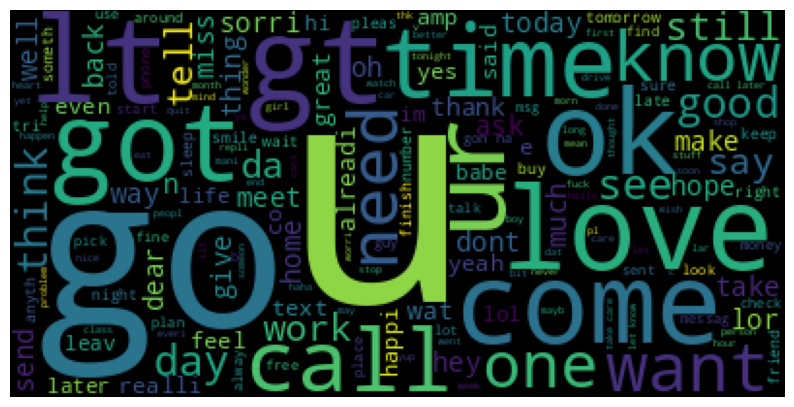

In [33]:
print('Ham Data Words')
wordCloud(hamdata)

In [34]:
spamdata = df[df['target']=='spam']
spamdata = spamdata['clean_text']

In [70]:
spamdata.shape

(747,)

In [35]:
spamdata

,clean_text
2,free entri 2 wkli comp win fa cup final tkts 2...
5,freemsg hey darl 3 week word back like fun sti...
8,winner valu network custom select receivea 900...
9,mobil 11 month u r entitl updat latest colour ...
11,six chanc win cash 100 20 000 pound txt csh11 ...
...,...
5537,want explicit sex 30 sec ring 02073162414 cost...
5540,ask 3mobil 0870 chatlin inclu free min india c...
5547,contract mobil 11 mnths latest motorola nokia ...
5566,remind o2 get 2 50 pound free call credit deta...


Spam Data Words


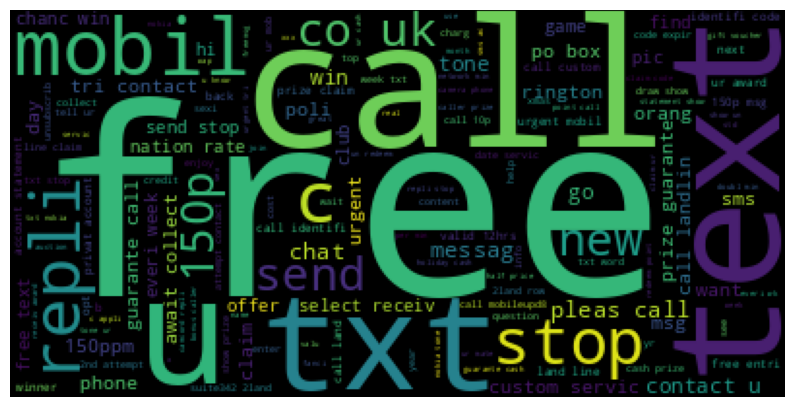

In [37]:
print('Spam Data Words')
wordCloud(spamdata)

## **Featurization**

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer(max_features=5000)

In [40]:
X = cv.fit_transform(df['clean_text']).toarray()

In [41]:
X.shape

(5572, 5000)

In [42]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
y = pd.get_dummies(df['target'])

In [46]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [47]:
y = y['spam'].values
y

array([False, False,  True, ..., False, False, False])

# **Model**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
XT,Xt,yT,yt = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
print(XT.shape,yT.shape,Xt.shape,yt.shape)

(4457, 5000) (4457,) (1115, 5000) (1115,)


In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
model = MultinomialNB()

In [53]:
model.fit(XT,yT)

MultinomialNB()

In [54]:
y_pred = model.predict(Xt)

In [55]:
y_pred

array([False,  True, False, ..., False,  True, False])

In [56]:
yt,y_pred

(array([False,  True, False, ..., False,  True, False]),
 array([False,  True, False, ..., False,  True, False]))

In [57]:
pd.DataFrame({
    'actual':yt,
    'predicted':y_pred
})

,actual,predicted
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
...,...,...
1110,False,False
1111,False,False
1112,False,False
1113,True,True


## **Model Evaluation**

In [58]:
model.score(XT,yT)

0.9916984518734575

In [59]:
model.score(Xt,yt)

0.9883408071748879

In [62]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix

In [66]:
classification_report(yt,y_pred)

'              precision    recall  f1-score   support\n\n       False       0.99      0.99      0.99       955\n        True       0.96      0.96      0.96       160\n\n    accuracy                           0.99      1115\n   macro avg       0.98      0.97      0.98      1115\nweighted avg       0.99      0.99      0.99      1115\n'

In [67]:
confusion_matrix(yt,y_pred)

array([[949,   6],
       [  7, 153]])

In [68]:
f1_score(yt,y_pred)

0.9592476489028213